<a href="https://colab.research.google.com/github/ksushrut/CoinClassifier/blob/main/Adv_CV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coin Classification

## Guidelines
1) Please import packages in the import section only.

2) Use sensible variable names. If possible try to describe the use of the variables in the variable description section.

3) Github commits and branches?

4) set device to gpu. No cpu!


# PIP Install statements

# Import packages here

In [7]:
# write only import statements here
import torch
import os
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
import random
from PIL import Image

# Variable Description:

##### Describe the essential variables here. preferable datatype and use. This is to make sure we understand the code we are using
eg: Xtrain: tensor, stores images for training

In [ ]:
print('heelow!')

heelow!


In [ ]:
print("Meeting")

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


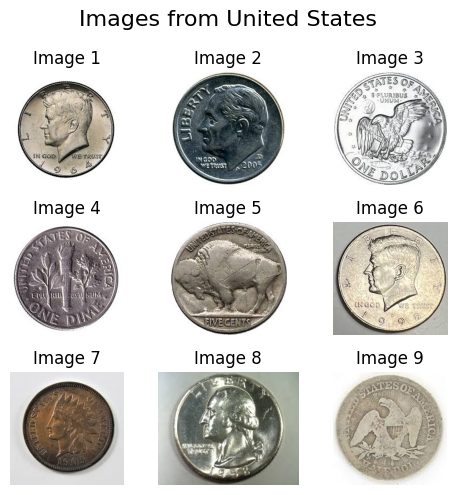

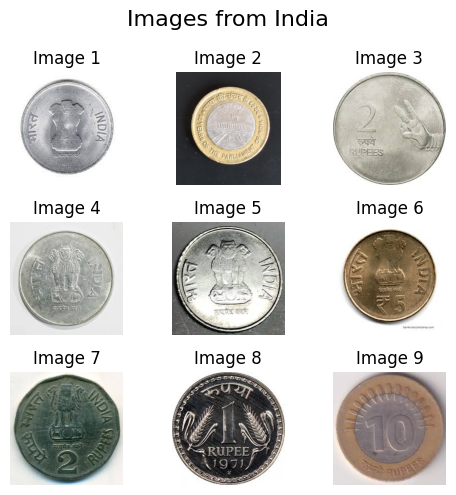

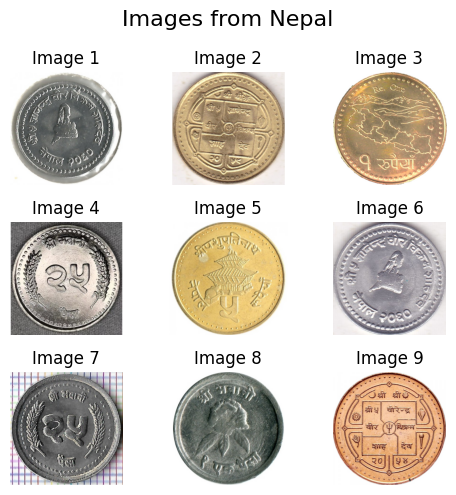

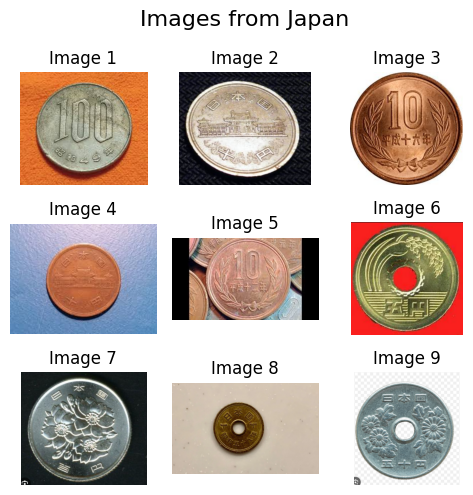

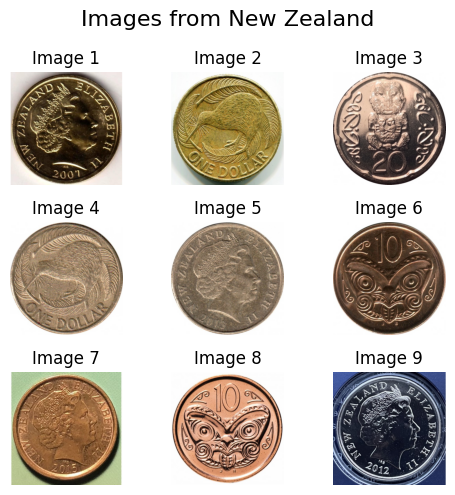

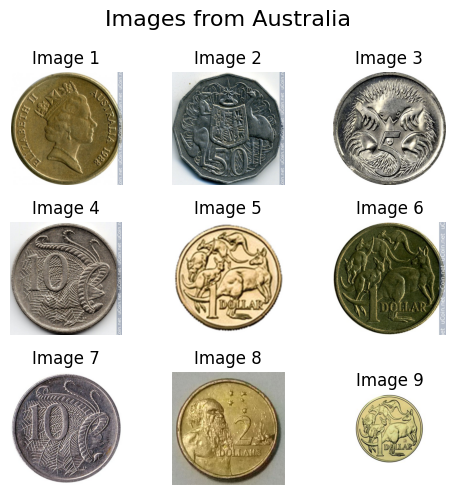

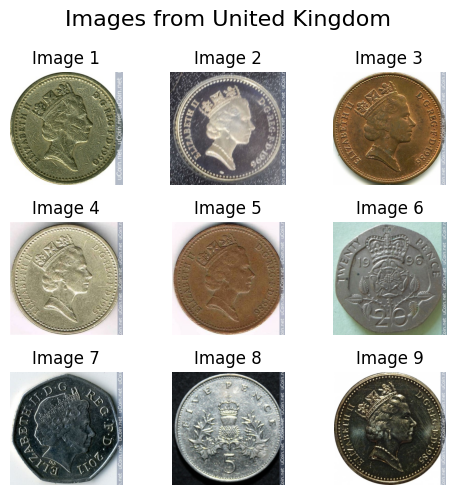

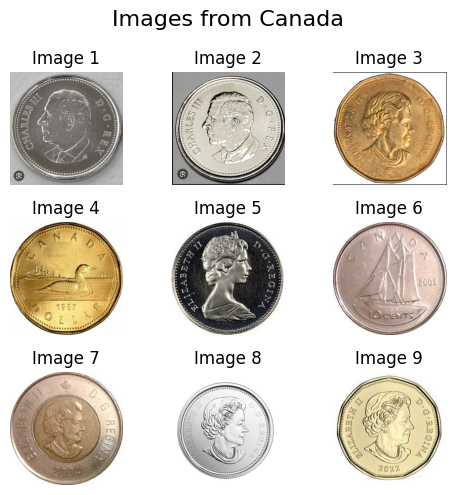

In [6]:
#Prerequisite for this cell: Right click on CoinImages in drive. Organize and then add short cut to My Drive
folder_path = "/content/drive/My Drive/CoinImages"
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

country_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Loop through each country folder
for country in country_folders:
    country_path = os.path.join(folder_path, country)

    # Collect all images from this country's subfolders
    image_files = []
    for root, _, files in os.walk(country_path):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                image_files.append(os.path.join(root, file))

    # If no images found, skip this country
    if len(image_files) == 0:
        print(f"No images found for {country}")
        continue

    # Select 9 random images (or fewer if less than 9 exist)
    random_images = random.sample(image_files, min(9, len(image_files)))

    # Display images in a 3x3 grid
    fig, axes = plt.subplots(3, 3, figsize=(5, 5))
    fig.suptitle(f"Images from {country}", fontsize=16)

    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            img_path = random_images[i]
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            ax.imshow(img)
            ax.set_title(f"Image {i+1}")
        ax.axis("off")  # Hide axes if no image

    plt.tight_layout()
    plt.show()

# **Data Preprocessing** DRAFT VERSION WILL EDIT LATER

This step will include image preprocessing methodoligies so as to increase the quality of the dataset before the training process. Techniques such as Image size standardization, normalization and augmentation will be used to:
1. Create additional images to bring the image per class count to 50.
2. Bring about variation and diversity in the original dataset, without permanently altering the dataset itself.

Reasons for choosing the steps:
1. Greyscale conversion transforms a three-channel image into a single channel, which helps reduce computational complexity, lower memory usage, and enhance processing speed.
2. Median blur smoothens out the noise from the coin images, while preserving the edge, which will make it easier to apply Hough Circle detection.
3. Hough Circle detection helps to identify and isolate circular regions of interest, such as coins, from the background by detecting prominent circular shapes within an image.

In [4]:
def image_preprocessor(img_path, img_size = (224,224)):
  """
  The function will load a coin image, detect the coin via Hough Circle detection,
  crop to the coin area, and resize to the desired output size.
  """
  coin_img = cv2.imread(img_path)
  if coin_img is None:
    return None

  # Greyscale Conversion
  gray_img = cv2.cvtColor(coin_img, cv2.COLOR_BGR2GRAY)

  # Median
  median_img = cv2.medianBlur(gray_img, 5)

  # Hough Circle Detectoin
  circles = cv2.HoughCircles(
      median_img,
      cv2.HOUGH_GRADIENT,
        dp=1.2,
        minDist=100,
        param1=50,
        param2=30,
        minRadius=50,
        maxRadius=300
    )

